Trial 20 Complete [00h 12m 37s]
val_loss: 0.0076814498752355576

Best val_loss So Far: 0.0043281749822199345
Total elapsed time: 07h 07m 20s

 =================== Evaluating Best Tuned Keras-Fusion Model (V7) ===================
Results summary
Results in keras_fusion_V7_tuning_dir/proper_bulk_keras_fusion_V7
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 11 summary
Hyperparameters:
num_dense_layers: 1
dense_0_units: 320
l2_reg: 3.275730371193078e-05
dropout_0: 0.30000000000000004
learning_rate: 0.0005
optimizer: adamw
dense_1_units: 448
dropout_1: 0.5
dense_2_units: 448
dropout_2: 0.5
weight_decay: 1.4757470647219656e-05
Score: 0.0043281749822199345

Trial 07 summary
Hyperparameters:
num_dense_layers: 2
dense_0_units: 128
l2_reg: 0.000287278866995306
dropout_0: 0.1
learning_rate: 0.0005
optimizer: adamw
dense_1_units: 128
dropout_1: 0.1
dense_2_units: 384
dropout_2: 0.4
weight_decay: 0.00036971848074886704
Score: 0.004454811569303274

Trial 17 summary
Hyperp

2025-11-11 08:02:32.425628: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0034 - mae: 0.0387


Test MSE: 0.0034, Test MAE: 0.0387
Best model saved to To_Publish_Bulk_Modulus_Best.h5 in the current directory.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cnn_input           │ (None, 16, 16,    │          0 │ -                 │
│ (InputLayer)        │ 16, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ magpie_input        │ (None, 132)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3D_CNN_Branch       │ (None, 256)       │  8,284,484 │ cnn_input[0][0]   │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Magpie_Branch       │ (None, 128)       │     68,480 │ magpie_input[0][… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ 3D_CNN_Branch[21… │
│ (Concatenate)       │                   │            │ Magpie_Branch[21… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 320)       │    123,200 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 320)       │      1,280 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 320)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        321 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,477,765 (32.34 MB)

 Trainable params: 8,471,877 (32.32 MB)

 Non-trainable params: 5,888 (23.00 KB)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step

 =================== FINAL 'TUNED KERAS-FUSION' (V7) RESULTS ===================
 R² Score:   0.9424
 MAE:        10.7702 GPa
 RMSE:       15.1425 GPa
Generating final plot...


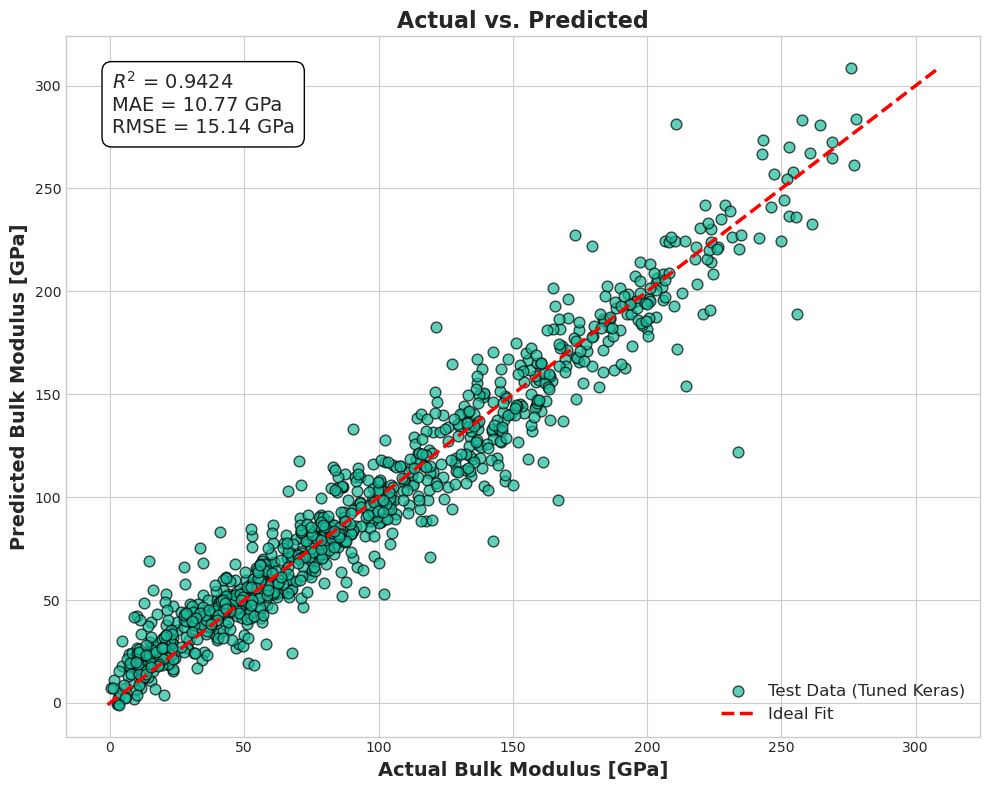

Script complete. Final model saved to 'To_Publish_Bulk_Modulus_Best.h5' and plot to 'To_Publish_Bulk_Modulus_Best.png'


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import models, layers, Model, regularizers
from tensorflow.keras.optimizers import Adam, AdamW
import keras_tuner as kt
import os
import random
import matplotlib.pyplot as plt
import warnings
from scipy import stats

# --- 0. FORCE SINGLE GPU ---
### MODIFICATION ###
# Set to '1' to match your reference script
os.environ['CUDA_VISIBLE_DEVICES'] = '1' 
print(f"!!! FORCING SCRIPT TO RUN ON GPU {os.environ['CUDA_VISIBLE_DEVICES']} ONLY !!!")

# --- 0. SET GPU MEMORY GROWTH ---
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Enabled memory growth for {len(gpus)} GPUs")
    except RuntimeError as e:
        print(e)
warnings.filterwarnings('ignore')

# --- 1. ULTRA SETUP AND REPRODUCIBILITY ---
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# --- 2. DATA LOADING & PREPARATION (FUSION) ---
print(" =================== Starting Tuned Keras-Fusion Data Processing =================== ")
try:
    df_main = pd.read_csv('6059_rows.csv')
    df_magpie = pd.read_csv('magpie_features.csv') 
    print("Successfully loaded '6059_rows.csv' and 'magpie_features.csv'")
except FileNotFoundError as e:
    print(f"Error: Could not find data files. {e}")
    exit()

print(" =================== Step 1/5: Aligning data sources =================== ")
df_main = df_main.dropna(subset=['bulk_hill']) 
df_aligned = pd.merge(df_main, df_magpie, on='formula_sp', how='inner')
magpie_cols = [col for col in df_magpie.columns if col != 'formula_sp']

print(" =================== Step 2/5: Loading 3D .npy data and aligning =================== ")
X_cnn_list = []
y_list = []
X_magpie_list = [] 
input_dir = 'input_cnn'
for index, row in df_aligned.iterrows():
    file_path = os.path.join(input_dir, f"{row['formula_sp']}_latent.npy")
    if os.path.exists(file_path):
        X_cnn_list.append(np.load(file_path))
        y_list.append(row['bulk_hill']) 
        X_magpie_list.append(row[magpie_cols].values)

X_cnn = np.array(X_cnn_list)
X_magpie = np.array(X_magpie_list)
y = np.array(y_list)
print(f"Loaded and aligned {len(X_cnn)} samples.")

print(" =================== Step 3/5: Applying data cleaning and scaling =================== ")
def remove_outliers_advanced(X_cnn_in, X_magpie_in, y_in):
    y_finite_mask = np.isfinite(y_in)
    X_cnn_in = X_cnn_in[y_finite_mask]; X_magpie_in = X_magpie_in[y_finite_mask]; y_in = y_in[y_finite_mask]
    Q1 = np.percentile(y_in, 25); Q3 = np.percentile(y_in, 75); IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR; upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (y_in >= lower_bound) & (y_in <= upper_bound)
    print(f"Original data shape: {len(y_in)}")
    print(f"Removed {len(y_in) - np.sum(outlier_mask)} outliers using 1.5*IQR")
    return X_cnn_in[outlier_mask], X_magpie_in[outlier_mask], y_in[outlier_mask]

X_cnn, X_magpie, y = remove_outliers_advanced(X_cnn, X_magpie, y)
print(f"Final data shape after cleaning: {X_cnn.shape}")

CNN_INPUT_SHAPE = X_cnn.shape[1:]
MAGPIE_INPUT_SHAPE = (X_magpie.shape[1],)

X_cnn_scaled = X_cnn / np.max(X_cnn) if np.max(X_cnn) != 0 else X_cnn
scaler_magpie = StandardScaler()
X_magpie_scaled = scaler_magpie.fit_transform(X_magpie)

# Using MinMaxScaler for the target, as in V2 and V4
scaler_y = MinMaxScaler() 
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
print(" =================== Data scaling complete =================== ")

print(" =================== Step 4/5: Creating final data splits =================== ")
# Using the split from your Keras Fusion (V4) script
X_cnn_train, X_cnn_test, X_magpie_train, X_magpie_test, y_train, y_test = train_test_split(
    X_cnn_scaled, X_magpie_scaled, y_scaled, test_size=0.2, random_state=seed_value
)
X_cnn_train, X_cnn_val, X_magpie_train, X_magpie_val, y_train, y_val = train_test_split(
    X_cnn_train, X_magpie_train, y_train, test_size=0.2, random_state=seed_value
)
print(f"3D Train/Val/Test sizes: {X_cnn_train.shape}, {X_cnn_val.shape}, {X_cnn_test.shape}")
print(f"Magpie Train/Val/Test sizes: {X_magpie_train.shape}, {X_magpie_val.shape}, {X_magpie_test.shape}")

# Create list inputs for Keras
train_inputs = [X_cnn_train, X_magpie_train]
val_inputs = [X_cnn_val, X_magpie_val]
test_inputs = [X_cnn_test, X_magpie_test]


# --- 5. FUSION MODEL ARCHITECTURE (NON-TUNABLE PARTS) ---
print(" =================== Step 5/5: Defining Fusion Model Architecture =================== ")

@tf.keras.utils.register_keras_serializable()
class DualAttention3D(layers.Layer):
    """ Custom Dual-Attention (Channel + Spatial) Layer """
    def __init__(self, reduction_ratio=16, **kwargs):
        super(DualAttention3D, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        self.channels = input_shape[-1]
        self.global_avg_pool = layers.GlobalAveragePooling3D()
        self.global_max_pool = layers.GlobalMaxPooling3D()
        self.dense1 = layers.Dense(units=max(self.channels // self.reduction_ratio, 8), activation='relu')
        self.dense2 = layers.Dense(units=self.channels, activation='sigmoid')
        self.conv1 = layers.Conv3D(2, 3, padding='same', activation='relu')
        self.conv2 = layers.Conv3D(1, 3, padding='same', activation='sigmoid')
        super(DualAttention3D, self).build(input_shape)

    def call(self, inputs):
        avg_pool = self.global_avg_pool(inputs)
        max_pool = self.global_max_pool(inputs)
        avg_pool = layers.Reshape((1, 1, 1, self.channels))(avg_pool)
        max_pool = layers.Reshape((1, 1, 1, self.channels))(max_pool)
        channel_avg = self.dense2(self.dense1(avg_pool))
        channel_max = self.dense2(self.dense1(max_pool))
        channel_attention = layers.Add()([channel_avg, channel_max])
        x = layers.Multiply()([inputs, channel_attention])
        spatial_avg = tf.reduce_mean(x, axis=-1, keepdims=True)
        spatial_max = tf.reduce_max(x, axis=-1, keepdims=True)
        spatial_concat = tf.concat([spatial_avg, spatial_max], axis=-1)
        spatial_attention = self.conv2(self.conv1(spatial_concat))
        output = layers.Multiply()([x, spatial_attention])
        return output

    def get_config(self):
        config = super(DualAttention3D, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config

def create_3d_cnn_branch(input_shape):
    """ This is the Ultra Deep ResNet 3D (non-tunable feature extractor) """
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv3D(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x); x = layers.Activation('swish')(x)
    x = layers.MaxPooling3D(2)(x)
    for filters in [64, 128, 256]:
        shortcut = x
        x = layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x); x = layers.Activation('swish')(x)
        x = layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x); x = DualAttention3D()(x) 
        if shortcut.shape[-1] != filters:
            shortcut = layers.Conv3D(filters, 1, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        x = layers.Add()([x, shortcut]); x = layers.Activation('swish')(x)
        shortcut = x
        x = layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x); x = layers.Activation('swish')(x)
        x = layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, shortcut]); x = layers.Activation('swish')(x)
    x = DualAttention3D()(x) 
    x = layers.GlobalAveragePooling3D()(x)
    model = Model(inputs, x, name="3D_CNN_Branch")
    return model

def create_magpie_branch(input_shape):
    """ A simple MLP for the tabular Magpie features (non-tunable feature extractor) """
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(256, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    model = Model(inputs, x, name="Magpie_Branch")
    return model

# --- 6. TUNABLE BUILD_MODEL FUNCTION ---

# Pre-build the non-tunable branches
cnn_branch = create_3d_cnn_branch(CNN_INPUT_SHAPE)
magpie_branch = create_magpie_branch(MAGPIE_INPUT_SHAPE)

def build_model(hp):
    """ Builds the complete, tunable fusion model """
    cnn_input = layers.Input(shape=CNN_INPUT_SHAPE, name="cnn_input")
    magpie_input = layers.Input(shape=MAGPIE_INPUT_SHAPE, name="magpie_input")
    cnn_features = cnn_branch(cnn_input)
    magpie_features = magpie_branch(magpie_input)
    combined_features = layers.concatenate([cnn_features, magpie_features])
    x = combined_features
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        x = layers.Dense(
            units=hp.Int(f'dense_{i}_units', min_value=128, max_value=512, step=64),
            activation='swish',
            kernel_regularizer=regularizers.l2(hp.Float('l2_reg', 1e-5, 1e-3, sampling='log'))
        )(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(
            rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)
        )(x)
    
    outputs = layers.Dense(1, activation='linear')(x)
    model = Model(inputs=[cnn_input, magpie_input], outputs=outputs)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'adamw'])
    
    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = AdamW(learning_rate=hp_learning_rate, 
                          weight_decay=hp.Float('weight_decay', 1e-5, 1e-3, sampling='log'))

    model.compile(optimizer=optimizer, 
                  loss='mse', # Using 'mse' as identified in V2/V4
                  metrics=['mae'])
    
    return model

# --- 7. KERAS TUNER EXECUTION ---
print("\n =================== Starting Keras Tuner Search (V7) ===================")

tuner_dir = 'keras_fusion_V7_tuning_dir'

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory=tuner_dir,
    project_name='proper_bulk_keras_fusion_V7'
)

tuner.search(
    train_inputs, y_train,
    validation_data=(val_inputs, y_val),
    epochs=150,
    batch_size=16, 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True) 
    ],
    verbose=2
)

# --- 8. EVALUATION & PLOTTING ---
print("\n =================== Evaluating Best Tuned Keras-Fusion Model (V7) ===================")
best_model = tuner.get_best_models(num_models=1)[0]
tuner.results_summary()

test_loss, test_mae = best_model.evaluate(test_inputs, y_test)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

final_model_name = 'To_Publish_Bulk_Modulus_Best.h5'
best_model.save(final_model_name)
print(f"Best model saved to {final_model_name} in the current directory.")

best_model.summary()

# --- 9. FINAL PLOTTING ---
y_pred = best_model.predict(test_inputs).flatten()

# Rescale data back to original GPa
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

r2 = r2_score(y_test_orig, y_pred_orig)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))

print("\n" + "="*60); 
print(" =================== FINAL 'TUNED KERAS-FUSION' (V7) RESULTS ==================="); 
print("="*60)
print(f" R² Score:   {r2:.4f}"); 
print(f" MAE:        {mae:.4f} GPa"); 
print(f" RMSE:       {rmse:.4f} GPa")
print("="*60)


print("Generating final plot...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

plt.scatter(y_test_orig, y_pred_orig, alpha=0.7, edgecolors='k', c='#1abc9c', s=60, label="Test Data (Tuned Keras)")
ideal_line = [min(y_test_orig.min(), y_pred_orig.min()), max(y_test_orig.max(), y_pred_orig.max())]
plt.plot(ideal_line, ideal_line, 'r--', lw=2.5, label="Ideal Fit")

metrics_text = (
    fr'$R^2$ = {r2:.4f}' + '\n' +
    fr'MAE = {mae:.2f} GPa' + '\n' +
    fr'RMSE = {rmse:.2f} GPa'
)
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel("Actual Bulk Modulus [GPa]", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Bulk Modulus [GPa]", fontsize=14, fontweight='bold')
plt.title(r'Actual vs. Predicted', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

### MODIFICATION ###
# Save the plot with the "To_Publish_" naming convention
final_plot_name = 'To_Publish_Bulk_Modulus_Best.png'
plt.savefig(final_plot_name, dpi=300)
plt.show()

print(f"Script complete. Final model saved to '{final_model_name}' and plot to '{final_plot_name}'")